In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(192)

In [6]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30

X, Y are 2-dim

In [7]:
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis=1)
Y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)

X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)
X.shape

(3, 60)

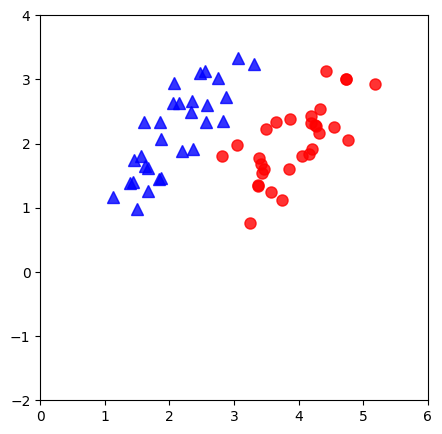

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))

ani = plt.cla()
# plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
ani = plt.axis([0, 6, -2, 4])
plt.show()

# Perceptron activation function

In [9]:
def h(w, x):
    return np.sign(w.T @ x)

# Compare the predicted value (Y_preds) with the given label (Y_true)

In [10]:
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

reshape to 3,1 for visualize?

In [34]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []

    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(-1, 1) # This is the same as transpose row to column vector IN REAL LIFE!! (if we use .T to a 1d array, it would not do anything)
            yi = y[0, mix_id[i]] # IDK why they made y 2-dim, we can just flatten the vector and use y[mix_id[i]]
            if h(w[-1], xi)[0] != yi: # Use the  lastest parameter to calculate the h(w, x) function, the h(w, x) return a 2-d array so we take the [0] to get the value
                mis_points.append(mix_id[i]) # Append the misclass point for analysis purpose (-_-)
                w_new = w[-1] + yi*xi # Update the 'better' w (Read gradient descent)
                w.append(w_new) # Instead of replacing the w, we append new w to a list (Same purpose for analysis )
        if has_converged(X, y, w[-1]): # Check if it is 100% correct (Y_predicts == Y_true) (Will lead to crash if you are not careful)
            break

    return (w, mis_points) 

![Alt text](image.png)

In [12]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
w, m = perceptron(X, Y, w_init)

mis_points

In [13]:
print(m)

[56, 12, 49, 6, 48, 17, 9, 20, 47, 28, 32, 7, 29, 32, 5, 41, 6, 18, 39, 5, 32, 23]


w arrays

In [32]:
h(w[-1], X[:,:35]).shape

(1, 35)

---

In [ ]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


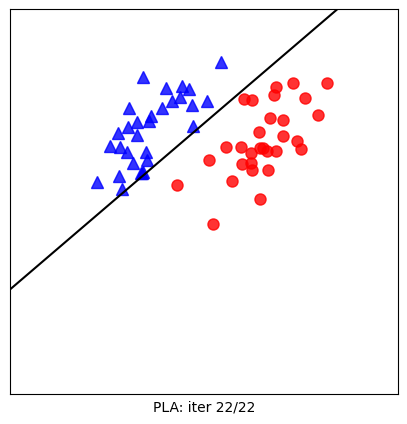

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        # points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
        ani = plt.axis([0, 6, -2, 4])
        i2 = i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]),
                                0.15, color='k', fill=False)
            ax.add_artist(circle)

        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        label = 'PLA: iter %d/%d' % (i2, it-1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(
        fig, update, frames=np.arange(0, it + 2), interval=1000)

    anim.save('pla_vis.gif', dpi=100, writer='imagemagick')
    plt.show()


viz_alg_1d_2(w)